## Analysis of 3 lane highway (A10) with a maximum speed of 100 km/h in opposite directions

Analysis of traffic data from 2017 (tuesdays) in opposite directions. The Data folder contains the raw data as obtained from: https://www.ndw.nu/pagina/nl/4/databank/31/actuele_verkeersgegevens/. The Output folder contains the processed data used to construct the graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [2]:
from os import listdir
from os.path import isfile, join


In [3]:
#list of excel file-names in Data folder
path = 'Data'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles = [path + '/' + x for x in onlyfiles]
print(onlyfiles)

['Data/24-01-2017 - intensity.xls', 'Data/04-04-2017 - speed.xls', 'Data/18-04-2017 - intensity.xls', 'Data/24-01-2017 - speed.xls', 'Data/07-02-2017 - intensity.xls', 'Data/07-02-2017 - speed.xls', 'Data/23-05-2017 - intensity.xls', 'Data/21-02-2017 - intensity.xls', 'Data/21-03-2017 - intensity.xls', 'Data/30-05-2017 - intensity.xls', 'Data/31-01-2017 - intensity.xls', 'Data/02-05-2017 - speed.xls', 'Data/23-05-2017 - speed.xls', 'Data/14-02-2017 - speed.xls', 'Data/28-03-2017 - intensity.xls', 'Data/11-04-2017 - intensity.xls', 'Data/16-05-2017 - speed.xls', 'Data/25-04-2017 - intensity.xls', 'Data/18-04-2017 - speed.xls', 'Data/31-01-2017 - speed.xls', 'Data/21-03-2017 - speed.xls', 'Data/16-05-2017 - intensity.xls', 'Data/09-05-2017 - intensity.xls', 'Data/07-03-2017 - speed.xls', 'Data/28-02-2017 - speed.xls', 'Data/30-05-2017 - speed.xls', 'Data/09-05-2017 - speed.xls', 'Data/02-05-2017 - intensity.xls', 'Data/21-02-2017 - speed.xls', 'Data/07-03-2017 - intensity.xls', 'Data/14-

In [4]:
#Importing the data from data-collection points 1 and 2 as dataframes
speed1 = []
speed2 = []
intensity1 = []
intensity2 = []
for x in onlyfiles:
    if x[-9:] == 'speed.xls':
        df = pd.read_excel(x, sheet_name=1,header = 3,usecols = range(0,6),nrows = 24)
        speed1.append(df)
        df = pd.read_excel(x, sheet_name=1,header = 30,usecols = range(0,6),nrows = 24)
        speed2.append(df)    
    if x[-13:] == 'intensity.xls':
        df = pd.read_excel(x, sheet_name=2,header = 3,usecols = range(0,6),nrows = 24)
        intensity1.append(df)
        df = pd.read_excel(x, sheet_name=2,header = 30,usecols = range(0,6),nrows = 24)
        intensity2.append(df)



In [5]:
#Creating dataframes with averages and errors
def averager(frame_list,start_range ,end_range,confidence_interval = 1.96):
    first = True
    for k in frame_list:
        cache = []
        for i in range(start_range, end_range):
            cache.append(k.iloc[:,i].tolist())
        if first:
            average = np.asarray(cache)
            first = False
        else:
            average = average + cache
    average_list = (average/len(frame_list)).tolist()
    error_list = []
    for i in range(start_range, end_range):
        cache = []
        for k in frame_list:
            cache.append(k.iloc[:,i].tolist())
        cache = np.asarray(cache)
        cache = cache.T.tolist()
        cache = [confidence_interval*np.std(x)/np.sqrt(len(x)) for x in cache]
        error_list.append(cache)
    average_frame = copy.deepcopy(frame_list[0])
    error_frame = copy.deepcopy(frame_list[0])
    counter = 0
    for i in range(start_range,end_range):
        n_1 = average_frame.columns[i]
        n_2 = error_frame.columns[i]
        average_frame[n_1] = average_list[counter]
        error_frame[n_2] = error_list[counter]
        counter = counter + 1
    return average_frame, error_frame

def merge_dataframes(intensity,speed):
    df1 = copy.deepcopy(intensity)
    df2 = copy.deepcopy(speed)
    n = df2.columns[0]
    df2.drop(n, axis = 1, inplace = True)
    n = df2.columns[4]
    df2.drop(n, axis = 1, inplace = True)
    result = pd.concat([df1, df2], axis=1, sort=False)
    return result

In [6]:
#Dataframes with averages and error of speed and intensity from 2 data collection points
speed_average_1, speed_error_1 = averager(speed1,1,5)
speed_average_2, speed_error_2 = averager(speed2,1,5)
intensity_average_1,intensity_error_1 = averager(intensity1,1,6)
intensity_average_2,intensity_error_2 = averager(intensity2,1,6)

## Analysis direction 1

In [7]:
#Continueing with only collection point 1 and output to .csv file in Output folder
average = merge_dataframes(intensity_average_1, speed_average_1)
error = merge_dataframes(intensity_error_1,speed_error_1)
cache_average = copy.deepcopy(average)
cache_error = copy.deepcopy(error)
average.to_csv('Output/Average_direction_1.csv')
error.to_csv('Output/Error_direction_1.csv')
print(average)

    Uur op de dag  Intensiteit per uur  Motor/personenauto (%)  \
0   00:00 - 00:59           347.333333               87.116598   
1   01:00 - 01:59           204.055556               79.984606   
2   02:00 - 02:59           132.333333               74.627091   
3   03:00 - 03:59           138.055556               67.233153   
4   04:00 - 04:59           215.722222               64.391918   
5   05:00 - 05:59          1049.166667               76.981978   
6   06:00 - 06:59          4418.055556               84.250746   
7   07:00 - 07:59          5998.222222               87.486007   
8   08:00 - 08:59          5901.833333               88.058709   
9   09:00 - 09:59          4365.777778               84.553681   
10  10:00 - 10:59          3221.444444               81.106798   
11  11:00 - 11:59          3063.555556               80.908808   
12  12:00 - 12:59          3338.277778               82.243837   
13  13:00 - 13:59          3382.055556               82.361314   
14  14:00 

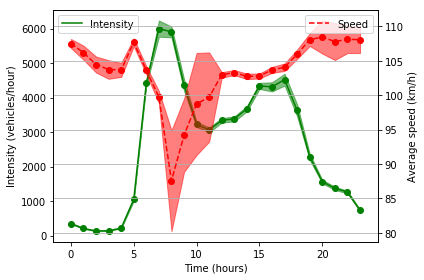

In [8]:
fig, ax1 = plt.subplots()

#Plotting the intensity
plot_variable = np.asarray(average["Intensiteit per uur"].tolist())
plot_error = np.asarray(error["Intensiteit per uur"].tolist())
x_axis = range(0,len(plot_variable))


ax1.set_xlabel('Time (hours)')
ax1.set_ylabel("Intensity (vehicles/hour)")
ax1.scatter(x_axis,plot_variable,c='g')
ax1.plot(x_axis,plot_variable,c='g')
ax1.tick_params(axis='y')
ax1.legend(("Intensity",), loc = 2)
ax1.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'g', alpha = 0.5)

#Plotting the average speed
plot_variable = np.asarray(average["Gemiddelde alle voertuigen"].tolist())
plot_error = np.asarray(error["Gemiddelde alle voertuigen"].tolist())
x_axis = range(0,len(plot_variable))

ax2 = ax1.twinx()  


ax2.set_ylabel('Average speed (km/h)') 
ax2.scatter(x_axis,plot_variable,c='r')
ax2.plot(x_axis,plot_variable,c='r', linestyle = '--')
ax2.tick_params(axis='y')
ax2.legend(("Speed",))
ax2.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'r', alpha = 0.5)
plt.grid(True)
fig.tight_layout()  
plt.show()

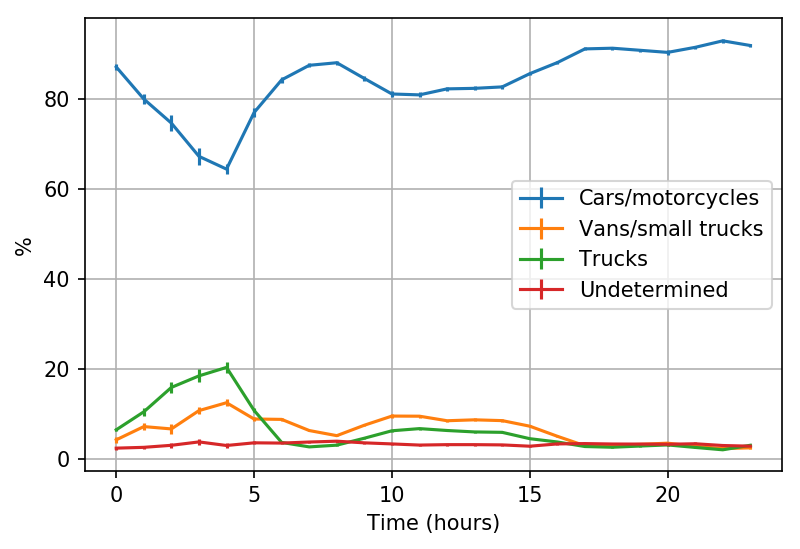

In [25]:
#Plotting the vehicle distribution
cars = np.asarray(average['Motor/personenauto (%)'].tolist())
cars_error = np.asarray(error['Motor/personenauto (%)'].tolist())
vans = np.asarray(average['Licht vrachtverkeer (%)'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer (%)'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer (%)'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer (%)'].tolist())
undetermined = np.asarray(average['Onbepaald  (%)'].tolist())
undetermined_error = np.asarray(error['Onbepaald  (%)'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = undetermined
plot_error = undetermined_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks','Undetermined'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('%')
plt.show()

Maximum speed cars/motorcycles: 110.11111111111111 km/h
Maximum speed vans/small trucks: 101.77777777777777 km/h
Maximum speed trucks: 86.27777777777777 km/h


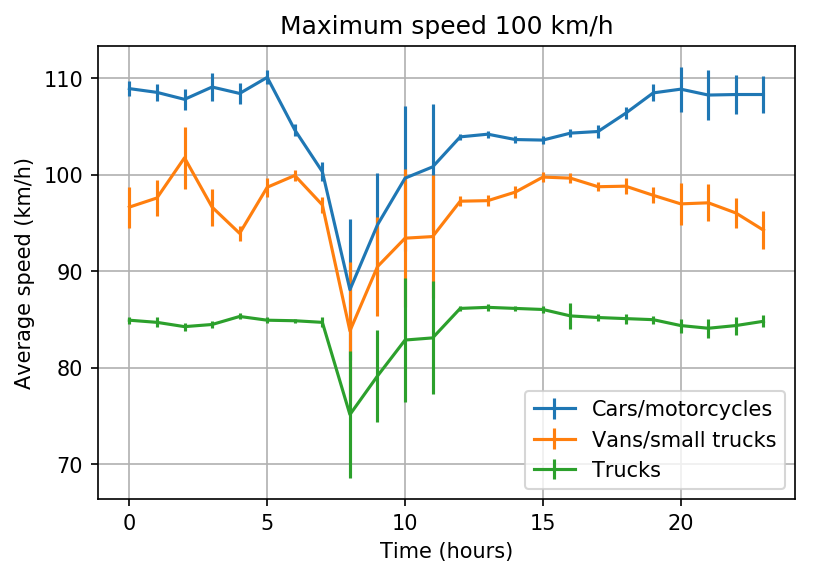

In [26]:
#Plotting the average speed per vehicle
cars = np.asarray(average['Motor/personenauto'].tolist())
cars_error = np.asarray(error['Motor/personenauto'].tolist())
vans = np.asarray(average['Licht vrachtverkeer'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)



plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('Average speed (km/h)')
print("Maximum speed cars/motorcycles: " + str(max(cars)) + ' km/h')
print("Maximum speed vans/small trucks: " + str(max(vans))+ ' km/h')
print("Maximum speed trucks: " + str(max(trucks))+ ' km/h')
plt.title('Maximum speed 100 km/h')
plt.show()


## Analysis direction 2

In [27]:
#Continueing with only collection point 2 and output to .csv file in Output folder
average = merge_dataframes(intensity_average_2, speed_average_2)
error = merge_dataframes(intensity_error_2,speed_error_2)
average.to_csv('Output/Average_direction_2.csv')
error.to_csv('Output/Error_direction_2.csv')
print(average)

    Uur op de dag  Intensiteit per uur  Motor/personenauto (%)  \
0   00:00 - 00:59           423.000000               86.858875   
1   01:00 - 01:59           255.277778               77.452801   
2   02:00 - 02:59           161.166667               70.159094   
3   03:00 - 03:59           145.277778               70.492891   
4   04:00 - 04:59           249.166667               67.661595   
5   05:00 - 05:59           869.166667               76.085488   
6   06:00 - 06:59          2864.333333               80.162830   
7   07:00 - 07:59          3870.222222               84.491667   
8   08:00 - 08:59          4323.500000               87.269963   
9   09:00 - 09:59          3431.666667               83.664352   
10  10:00 - 10:59          3015.666667               80.472538   
11  11:00 - 11:59          2926.500000               79.705298   
12  12:00 - 12:59          3202.055556               81.860746   
13  13:00 - 13:59          3346.444444               82.706555   
14  14:00 

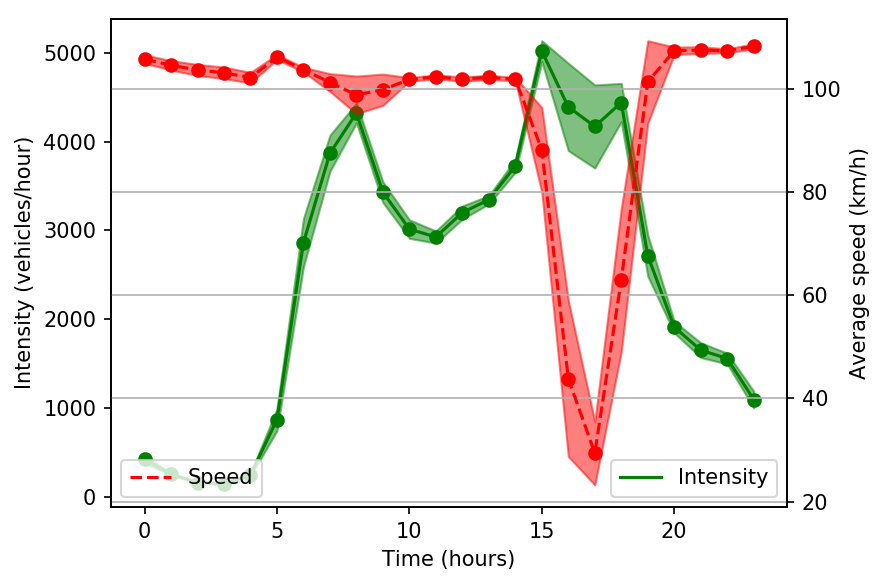

In [28]:
fig, ax1 = plt.subplots()

#Plotting the intensity
plot_variable = np.asarray(average["Intensiteit per uur"].tolist())
plot_error = np.asarray(error["Intensiteit per uur"].tolist())
x_axis = range(0,len(plot_variable))


ax1.set_xlabel('Time (hours)')
ax1.set_ylabel("Intensity (vehicles/hour)")
ax1.scatter(x_axis,plot_variable,c='g')
ax1.plot(x_axis,plot_variable,c='g')
ax1.tick_params(axis='y')
ax1.legend(("Intensity",), loc = 4)
ax1.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'g', alpha = 0.5)

#Plotting the average speed
plot_variable = np.asarray(average["Gemiddelde alle voertuigen"].tolist())
plot_error = np.asarray(error["Gemiddelde alle voertuigen"].tolist())
x_axis = range(0,len(plot_variable))

ax2 = ax1.twinx()  


ax2.set_ylabel('Average speed (km/h)') 
ax2.scatter(x_axis,plot_variable,c='r')
ax2.plot(x_axis,plot_variable,c='r', linestyle = '--')
ax2.tick_params(axis='y')
ax2.legend(("Speed",))
ax2.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'r', alpha = 0.5)
plt.grid(True)
fig.tight_layout()  
plt.show()

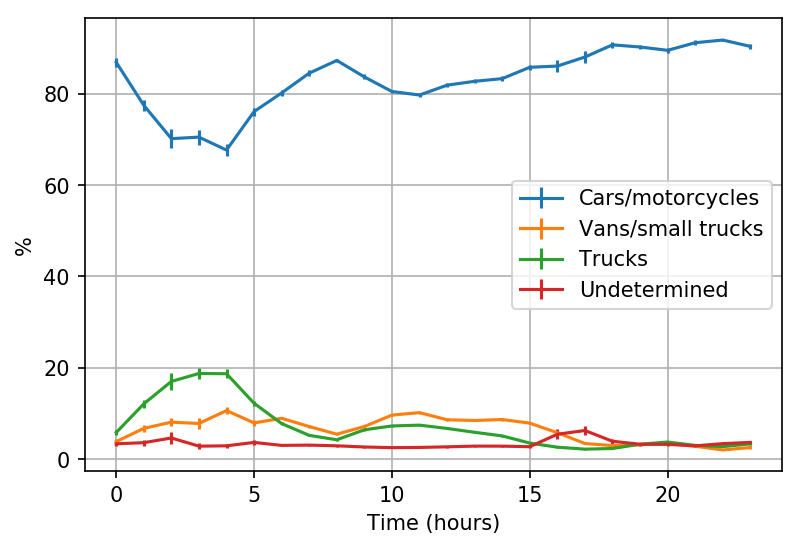

In [29]:
#Plotting the vehicle distribution
cars = np.asarray(average['Motor/personenauto (%)'].tolist())
cars_error = np.asarray(error['Motor/personenauto (%)'].tolist())
vans = np.asarray(average['Licht vrachtverkeer (%)'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer (%)'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer (%)'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer (%)'].tolist())
undetermined = np.asarray(average['Onbepaald  (%)'].tolist())
undetermined_error = np.asarray(error['Onbepaald  (%)'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = undetermined
plot_error = undetermined_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks','Undetermined'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('%')
plt.show()

Maximum speed cars/motorcycles: 108.83333333333333 km/h
Maximum speed vans/small trucks: 100.72222222222223 km/h
Maximum speed trucks: 85.44444444444444 km/h


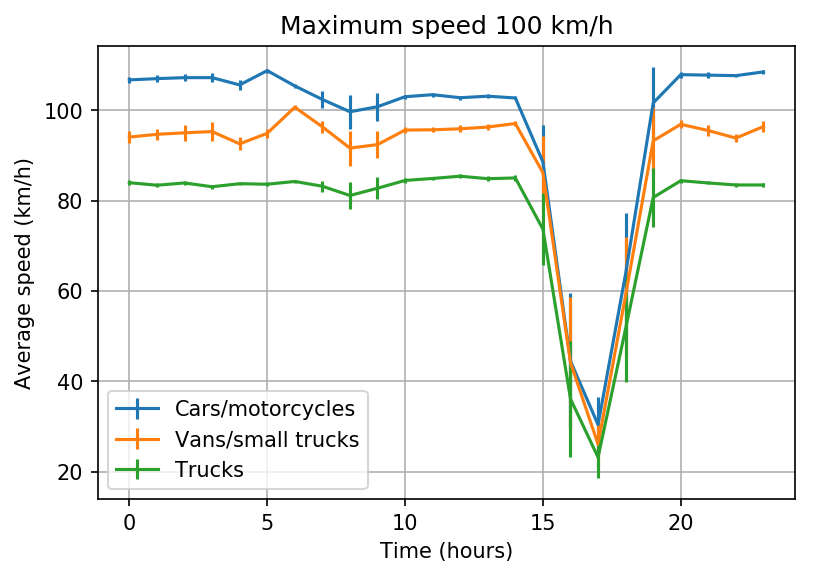

In [30]:
#Plotting the average speed per vehicle
cars = np.asarray(average['Motor/personenauto'].tolist())
cars_error = np.asarray(error['Motor/personenauto'].tolist())
vans = np.asarray(average['Licht vrachtverkeer'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)



plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('Average speed (km/h)')
print("Maximum speed cars/motorcycles: " + str(max(cars)) + ' km/h')
print("Maximum speed vans/small trucks: " + str(max(vans))+ ' km/h')
print("Maximum speed trucks: " + str(max(trucks))+ ' km/h')
plt.title('Maximum speed 100 km/h')
plt.show()


## Comparing intensities & speed

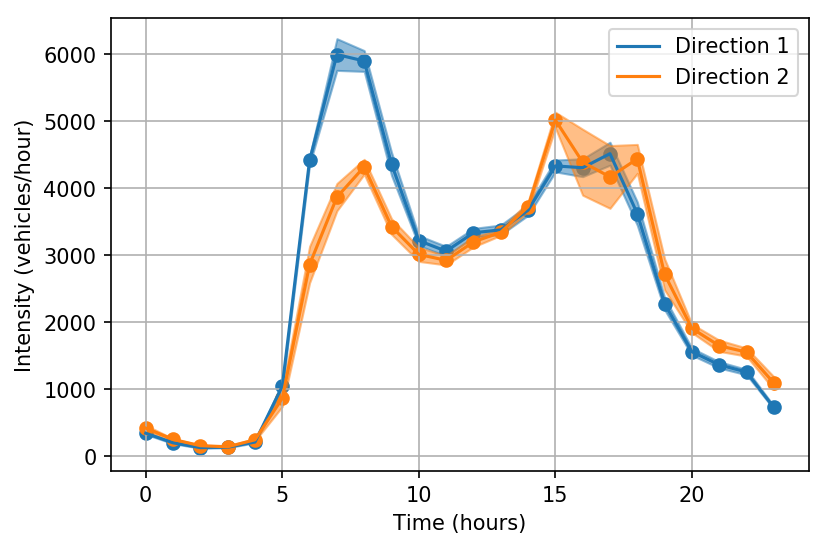

In [31]:
direction_1 = np.asarray(cache_average["Intensiteit per uur"].tolist())
direction_1_error = np.asarray(cache_error["Intensiteit per uur"].tolist())
direction_2 = np.asarray(average["Intensiteit per uur"].tolist())
direction_2_error = np.asarray(error["Intensiteit per uur"].tolist())
x_axis = np.asarray(range(0,24))
plt.xlabel("Time (hours)")
plt.ylabel("Intensity (vehicles/hour)")
plt.plot(direction_1, c = '#1f77b4')
plt.scatter(x_axis, direction_1, c = '#1f77b4')
plt.fill_between(x_axis, direction_1 - direction_1_error
                 , direction_1 + direction_1_error, color = '#1f77b4', alpha = 0.5)
plt.plot(direction_2, c = '#ff7f0e')
plt.scatter(x_axis, direction_2, c = '#ff7f0e')
plt.fill_between(x_axis, direction_2 - direction_2_error
                 , direction_2 + direction_2_error, color = '#ff7f0e', alpha = 0.5)
plt.legend(('Direction 1', 'Direction 2'))
plt.grid(True)
plt.show()



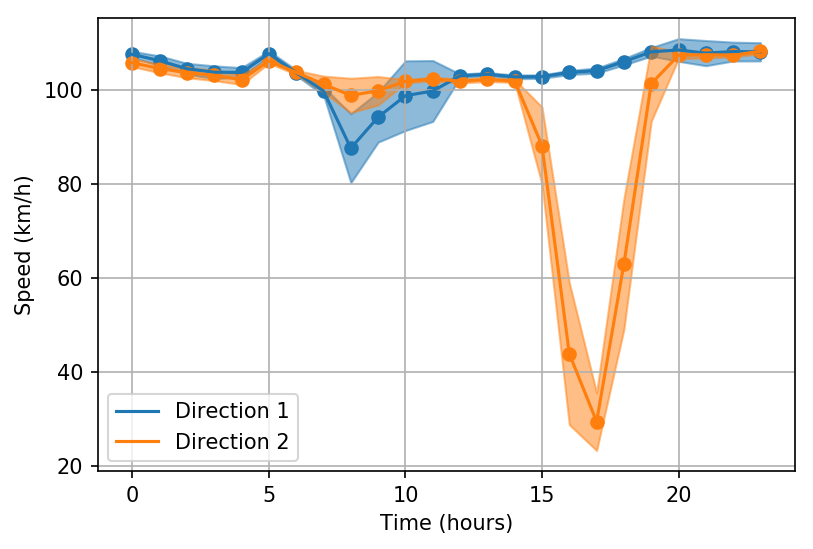

In [32]:
direction_1 = np.asarray(cache_average["Gemiddelde alle voertuigen"].tolist())
direction_1_error = np.asarray(cache_error["Gemiddelde alle voertuigen"].tolist())
direction_2 = np.asarray(average["Gemiddelde alle voertuigen"].tolist())
direction_2_error = np.asarray(error["Gemiddelde alle voertuigen"].tolist())
x_axis = np.asarray(range(0,24))
plt.xlabel("Time (hours)")
plt.ylabel("Speed (km/h)")
plt.plot(direction_1, c = '#1f77b4')
plt.scatter(x_axis, direction_1, c = '#1f77b4')
plt.fill_between(x_axis, direction_1 - direction_1_error
                 , direction_1 + direction_1_error, color = '#1f77b4', alpha = 0.5)
plt.plot(direction_2, c = '#ff7f0e')
plt.scatter(x_axis, direction_2, c = '#ff7f0e')
plt.fill_between(x_axis, direction_2 - direction_2_error
                 , direction_2 + direction_2_error, color = '#ff7f0e', alpha = 0.5)
plt.legend(('Direction 1', 'Direction 2'))
plt.grid(True)
plt.show()


## Importing data from runs

In [13]:
path = 'Data from runs'
listdir('../runs')
# onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
# onlyfiles = [path + '/' + x for x in onlyfiles]
# print(onlyfiles)

['snelheden_1.csv', 'batch_run1.tar.xz', 'posities_1.csv']

In [16]:
run_data = pd.read_csv('../runs/batch_run1.tar.xz')
run_data.drop(run_data.columns[0], axis = 1, inplace = True)
print(run_data.head())
# amount_runs = run_data["Run"].tolist()[-1]

    Avg_speed  Cars_in_lane     Model Params  Run
0  102.218157          27.0  (0.1, 0.9, 0.5)  1.0
1  102.203229          27.0  (0.1, 0.9, 0.5)  1.0
2  102.223893          27.0  (0.1, 0.9, 0.5)  1.0
3  102.217971          27.0  (0.1, 0.9, 0.5)  1.0
4  102.213989          27.0  (0.1, 0.9, 0.5)  1.0


In [29]:
bla = run_data.drop(run_data.columns[3], axis=1)
bla.head()

,Avg_speed,Cars_in_lane,Model Params
0,102.218157,27.0,"(0.1, 0.9, 0.5)"
1,102.203229,27.0,"(0.1, 0.9, 0.5)"
2,102.223893,27.0,"(0.1, 0.9, 0.5)"
3,102.217971,27.0,"(0.1, 0.9, 0.5)"
4,102.213989,27.0,"(0.1, 0.9, 0.5)"


In [50]:
bla['Model Params'].apply(pd.Series)

KeyboardInterrupt: 

In [49]:
bla.head()

,Avg_speed,Cars_in_lane,Model Params
0,102.218157,27.0,"(0.1, 0.9, 0.5)"
1,102.203229,27.0,"(0.1, 0.9, 0.5)"
2,102.223893,27.0,"(0.1, 0.9, 0.5)"
3,102.217971,27.0,"(0.1, 0.9, 0.5)"
4,102.213989,27.0,"(0.1, 0.9, 0.5)"


In [30]:
yo = bla.groupby('Model Params')

In [32]:
stats_run1 = yo.agg([np.mean, np.std])

In [39]:
stats_run1.keys

<bound method NDFrame.keys of                                   Avg_speed           Cars_in_lane           
                                       mean       std         mean        std
Model Params                                                                 
(0.1, 0.09999999999999998, 0.5)  117.674298  0.973068     44.74275   3.784396
(0.1, 0.09999999999999998, 1.0)  116.765689  1.082039     53.73925   6.658967
(0.1, 0.09999999999999998, 1.5)  117.289283  1.292973     49.21100   4.362996
(0.1, 0.09999999999999998, 2.0)  116.503101  1.766805     41.35175   6.958170
(0.1, 0.09999999999999998, 2.5)  114.555506  1.965491     48.61775  10.944477
(0.1, 0.09999999999999998, 3.0)  112.216799  1.737679     50.84350   7.204511
(0.1, 0.09999999999999998, 3.5)  113.901866  1.827020     46.57075   5.261931
(0.1, 0.09999999999999998, 4.0)  113.467457  2.025266     45.88125   3.943924
(0.1, 0.09999999999999998, 4.5)  112.228946  1.959018     45.63500   6.243518
(0.1, 0.19999999999999996, 0.5)  1

In [40]:
test1 = pd.DataFrame(stats_run1['Model Params'].tolist(), index=stats_run1.index)

KeyError: 'Model Params'

In [76]:
#Sort dataframes per run
list_of_dataframes = [run_data.loc[run_data['Run'] == x] for x in range(1,amount_runs + 1)]
print("Done")

Done


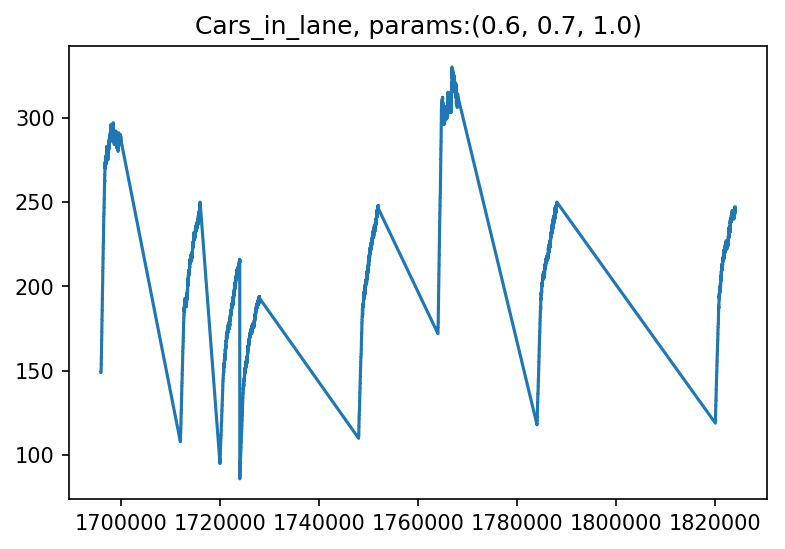

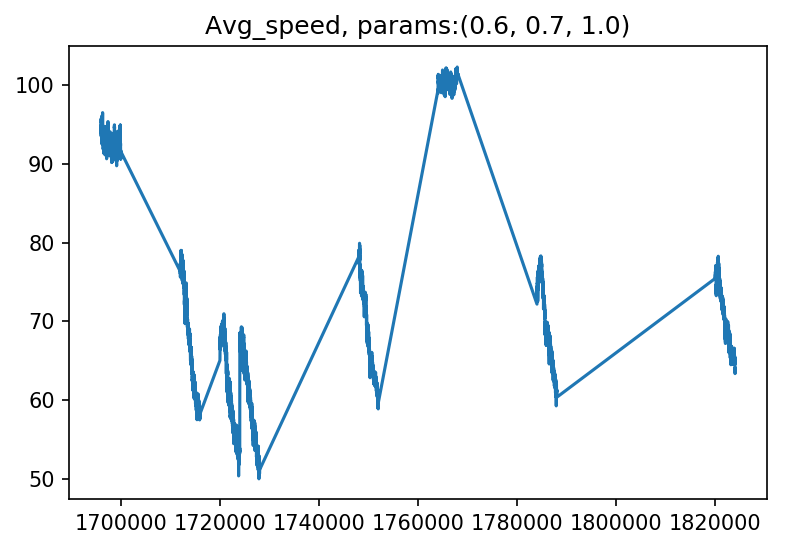

In [88]:
#Plotting sp
run_number = 55
plt.plot(list_of_dataframes[run_number - 1]["Cars_in_lane"])
plt.title("Cars_in_lane, params:" + str(list_of_dataframes[run_number - 1]["Model Params"].tolist()[0]))
plt.show()
plt.plot(list_of_dataframes[run_number-1]["Avg_speed"])
plt.title("Avg_speed, params:" + str(list_of_dataframes[run_number - 1]["Model Params"].tolist()[0]))
plt.show()

